In [1]:
import h5py
import numpy as np

# 打开 h5 文件
f = h5py.File('LDC2_spritz_mbhb1_training_v1.h5', 'r')

# 打印文件中所有数据集路径，看看有什么
def printname(name):
    print(name)

#f.visit(printname)

In [2]:
from WDMWaveletTransforms.wavelet_transforms import transform_wavelet_time

using mkl fft


In [3]:
raw    = f['obs/tdi'][()]
data_X = np.nan_to_num(raw['X'].flatten())

In [4]:
# 2. 直接用全长
ND =  len(data_X)            # 535680

In [5]:
# 3. 选择能整除的 Nf、Nt
Nf = 640
Nt = ND // Nf              

In [6]:
# 4. 小波变换
wave = transform_wavelet_time(data_X, Nf, Nt)

In [7]:
# 假设 wave.shape == (Nt, Nf)
spec = np.abs(wave)         # 幅度谱
spec_norm = spec / spec.max()   # 归一化到 [0,1]
spec_db = 20*np.log10(spec_norm + 1e-6)  
# 加 1e-6 防止 log(0)

print("spec    min/max:", spec.min(), spec.max())
print("norm   min/max:", spec_norm.min(), spec_norm.max())
print("spec_db min/max:", spec_db.min(), spec_db.max())

spec    min/max: 0.0 1.4498879791104207e-16
norm   min/max: 0.0 1.0
spec_db min/max: -120.0 8.685885294408554e-06


In [8]:
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

In [9]:
# 5. 生成坐标轴
dt    = 5                  # 5秒/点
time  = np.arange(Nt)*Nf*dt/86400.  # Nt段，每段Nf×dt秒
f_nyq = 1/(2*dt)
freqs = np.linspace(1/Nf, f_nyq, Nf)

In [10]:
spec2 = gaussian_filter(spec_db, sigma=(1,0.1))

In [11]:
# 裁剪左右
t0, t1 = 0.5, 30.6
mask = (time >= t0) & (time <= t1)  # 注意转置到 (Nf, Nt2)
time2 = time[mask]

percentile 1%: -118.89249885321134 99%: -74.42584504301185


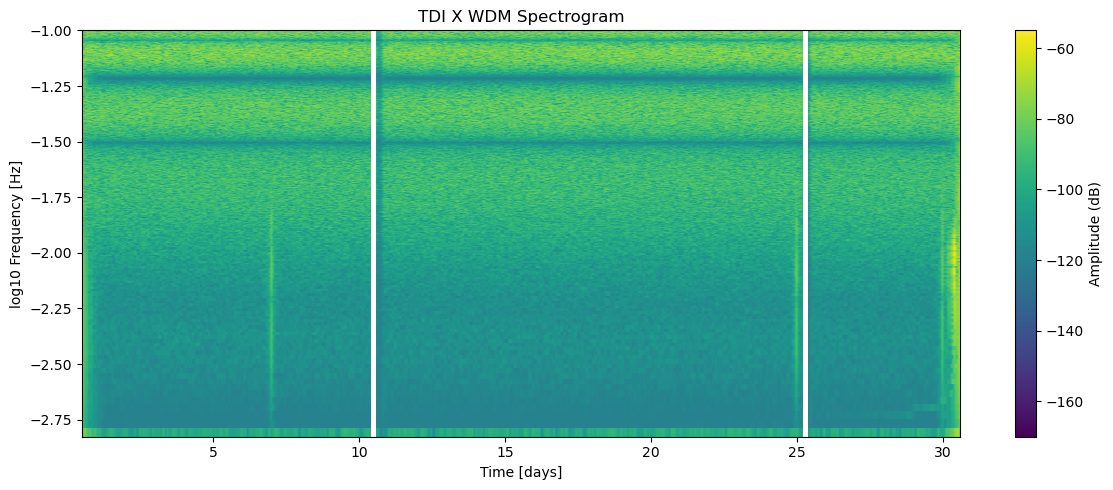

In [12]:
spec3 = spec2[mask,:]

p1, p99 = np.percentile(spec3, [1, 99])
print("percentile 1%:", p1, "99%:", p99)

plt.figure(figsize=(12,5))
pcm = plt.pcolormesh(
    time2,
    np.log10(freqs),
    spec3.T,
    shading='auto',
    cmap='viridis',
    vmin=-170,          #增大这个整体变蓝
    vmax=-55            #减小这个整体变绿
)
plt.colorbar(label='Amplitude (dB)')
plt.xlabel('Time [days]')
plt.ylabel('log10 Frequency [Hz]')
plt.title('TDI X WDM Spectrogram')

# 用白色半透明矩形遮住 gap 时间
for gap_center in [10.5, 25.3]:     # gap 发生的天数
    half_width = 7/24/3       
    plt.axvspan(gap_center-half_width, gap_center+half_width,
                color='white', ec='none', alpha=1.0)

plt.tight_layout()
plt.show()

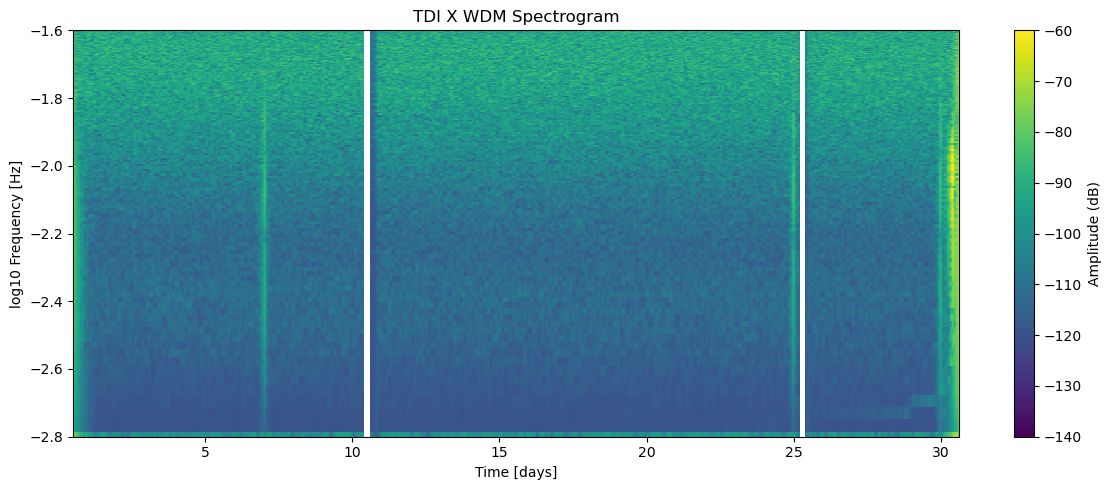

In [13]:
plt.figure(figsize=(12,5))
plt.pcolormesh(
    time2,
    np.log10(freqs),
    spec3.T,
    shading='auto',
    cmap='viridis',
    vmin=-140,
    vmax=-60
)
plt.colorbar(label='Amplitude (dB)')
plt.xlabel('Time [days]')
plt.ylabel('log10 Frequency [Hz]')
plt.title('TDI X WDM Spectrogram')
plt.ylim(bottom=-2.8, top=-1.6)

# 用白色半透明矩形遮住 gap 时间
for gap_center in [10.5, 25.3]:     # gap 发生的天数
    half_width = 7/24/3       
    plt.axvspan(gap_center-half_width, gap_center+half_width,
                color='white', ec='none', alpha=1.0)

plt.tight_layout()
plt.show()